In [1]:

%pprint
import sys
if ('../py' not in sys.path): sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from FRVRS import nu, fu
from pandas import DataFrame


# Visualize Ideal Engagement Order

In [3]:

# load data frames
data_frames_list = nu.load_data_frames(
    frvrs_logs_df='frvrs_logs_df', distance_delta_df='distance_delta_df', summary_statistics_df='summary_statistics_df'
)
frvrs_logs_df = data_frames_list['frvrs_logs_df']
print(frvrs_logs_df.shape) # (829116, 125)

Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/frvrs_logs_df.pkl.
Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/distance_delta_df.pkl.
Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/summary_statistics_df.pkl.
(829116, 125)


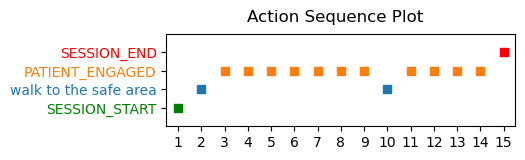

In [4]:

# Get the scene tuple with the longest ideal path compared to actual
distance_delta_df = data_frames_list['distance_delta_df']
df = distance_delta_df.sort_values('actual_ideal_delta')
session_uuid = df.iloc[0].session_uuid
scene_id = df.iloc[0].scene_id
scene_tuple = (session_uuid, scene_id)

# Plot what the actions look like
time_groups_dict = nu.load_object('time_groups_dict')
alphabet_list = ['SESSION_START', 'walk to the safe area', 'PATIENT_ENGAGED', 'SESSION_END']
sequence = [s for s in time_groups_dict[scene_tuple] if s in alphabet_list]
title = f'Action Sequence Plot'
summary_statistics_df = data_frames_list['summary_statistics_df']

actions_mask_series = frvrs_logs_df.action_type.isin(alphabet_list)
actions_mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & frvrs_logs_df.voice_command_message.isin(alphabet_list))

fig, ax = fu.plot_sequence_by_scene_tuple(
    scene_tuple, sequence, frvrs_logs_df, summary_statistics_df=summary_statistics_df, actions_mask_series=actions_mask_series,
    suptitle=title, verbose=False
)

In [5]:

# Get the data frame with the longest ideal path compared to actual
mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.scene_id == scene_id)
scene_df = frvrs_logs_df[mask_series]

color_dict = {
    'Gary_3 Root': '#a6cee3', 'Mike_7 Root': '#1f78b4', 'Gloria_6 Root': '#b2df8a', 'Bob_0 Root': '#33a02c', 'Lily_4 Root': '#fb9a99',
    'Gary_1 Root': '#fdbf6f', 'Gary_9 Root': '#ff7f00', 'Lily_2 Root': '#cab2d6', 'Mike_5 Root': '#6a3d9a', 'Gloria_8 Root': '#bbbb00', 'Helga_10 Root': '#b15928'
}


Here's the actual:

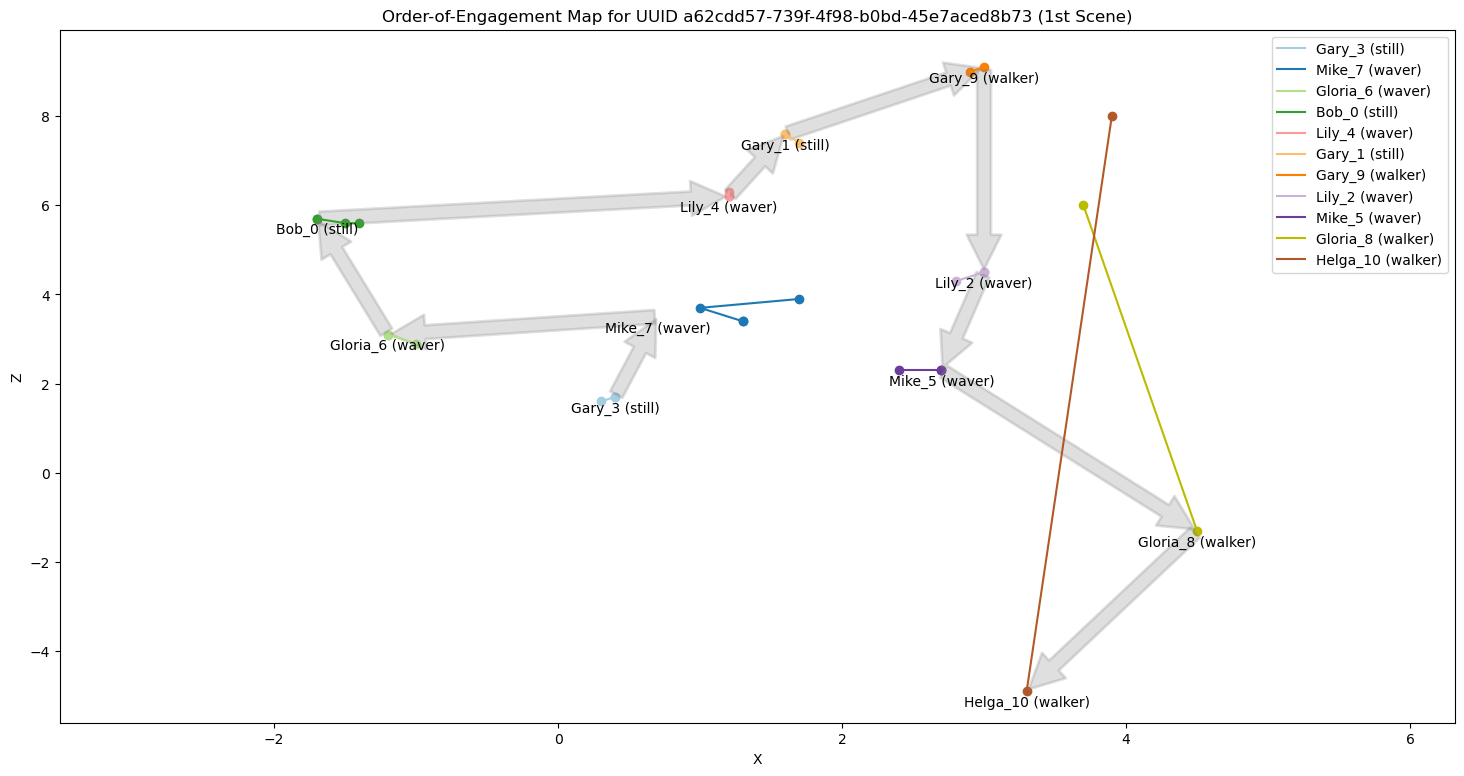

In [6]:

fig, ax = fu.visualize_order_of_engagement(scene_df, engagement_order=None, color_dict=color_dict, verbose=False)


Here's the ideal:

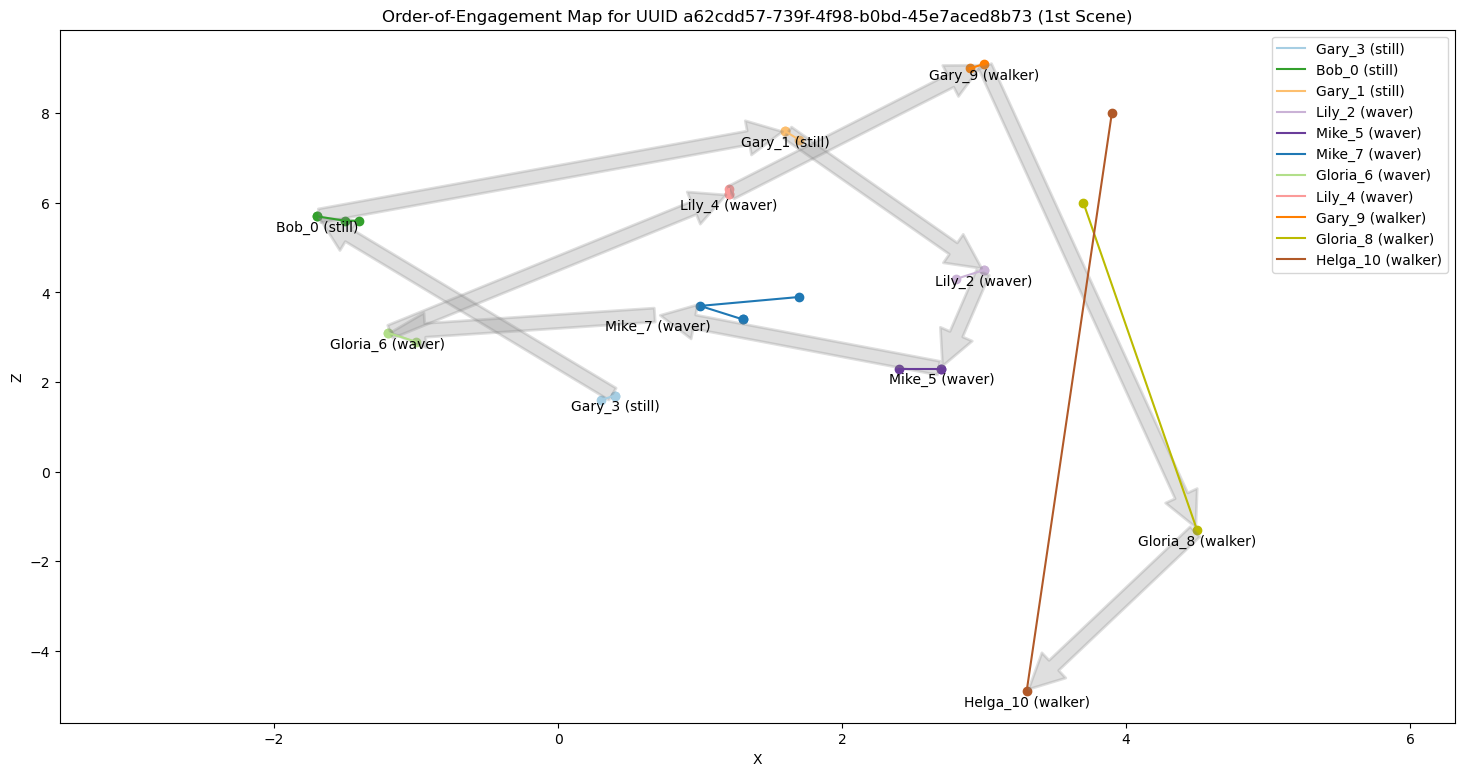

In [7]:

fig, ax = fu.visualize_order_of_engagement(scene_df, engagement_order=fu.get_ideal_engagement_order(scene_df), color_dict=color_dict)

In [11]:

import random

# for (session_uuid, scene_id), scene_df in frvrs_logs_df.groupby(fu.scene_groupby_columns): break
random_session_uuid = random.choice(frvrs_logs_df.session_uuid.unique())
mask_series = (frvrs_logs_df.session_uuid == random_session_uuid)
random_scene_id = random.choice(frvrs_logs_df[mask_series].scene_id.unique())
base_mask_series = (frvrs_logs_df.session_uuid == random_session_uuid) & (frvrs_logs_df.scene_id == random_scene_id)
scene_df = frvrs_logs_df[base_mask_series]

In [12]:

fu.get_actual_engagement_order(scene_df)

[('Gary_3 Root', 456850, (0.0, 2.0), 'still', 8.533333333333333, 'high'), ('Bob_0 Root', 510166, (-1.0, 6.0), 'still', 8.458333333333334, 'high'), ('Gloria_6 Root', 576056, (-1.0, 3.2), 'waver', 5.833333333333333, 'medium'), ('Mike_7 Root', 648162, (1.4, 4.0), 'waver', 8.178571428571429, 'medium'), ('Mike_5 Root', 898451, (2.6, 2.0), 'waver', 8.387096774193548, 'medium'), ('Lily_2 Root', 976697, (3.0, 4.0), 'waver', 8.041666666666666, 'high'), ('Gloria_8 Root', 1060071, (4.0, 6.0), 'walker', 7.882352941176471, 'low'), ('Lily_4 Root', 1151611, (1.4, 6.0), 'waver', 8.25, 'medium'), ('Gary_1 Root', 1204747, (2.0, 7.0), 'still', 8.555555555555555, 'high'), ('Bob_9 Root', 1258769, (2.5, 8.1), 'walker', 6.142857142857143, 'low'), ('Helga_10 Root', 1285736, (3.9, 8.0), 'walker', 6.0, 'low')]

In [15]:

fu.get_ideal_engagement_order(scene_df)

[('Gary_3 Root', 456850, (0.0, 2.0), 'still', 8.533333333333333, 'high'), ('Bob_0 Root', 510166, (-1.0, 6.0), 'still', 8.458333333333334, 'high'), ('Gary_1 Root', 1204747, (2.0, 7.0), 'still', 8.555555555555555, 'high'), ('Lily_2 Root', 976697, (3.0, 4.0), 'waver', 8.041666666666666, 'high'), ('Mike_7 Root', 648162, (1.4, 4.0), 'waver', 8.178571428571429, 'medium'), ('Lily_4 Root', 1151611, (1.4, 6.0), 'waver', 8.25, 'medium'), ('Gloria_6 Root', 576056, (-1.0, 3.2), 'waver', 5.833333333333333, 'medium'), ('Mike_5 Root', 898451, (2.6, 2.0), 'waver', 8.387096774193548, 'medium'), ('Gloria_8 Root', 1060071, (4.0, 6.0), 'walker', 7.882352941176471, 'low'), ('Helga_10 Root', 1285736, (3.9, 8.0), 'walker', 6.0, 'low'), ('Bob_9 Root', 1258769, (2.5, 8.1), 'walker', 6.142857142857143, 'low')]


# Visualize Decision Tree

In [3]:

dtr_model = nu.load_object('dtr_triage_priority_model')
feature_names = nu.load_object('spreadsheet_1hot_columns')

In [4]:

import sklearn

tree_text = sklearn.tree.export_text(dtr_model, feature_names=feature_names)
print(tree_text)

|--- patient_sort_walker <= 0.50
|   |--- injury_required_procedure_none <= 0.50
|   |   |--- patient_pose_fetal <= 0.50
|   |   |   |--- patient_pose_supine <= 0.50
|   |   |   |   |--- injury_required_procedure_woundpack <= 0.50
|   |   |   |   |   |--- value: [8.00]
|   |   |   |   |--- injury_required_procedure_woundpack >  0.50
|   |   |   |   |   |--- value: [7.50]
|   |   |   |--- patient_pose_supine >  0.50
|   |   |   |   |--- injury_id_face_shrapnel <= 0.50
|   |   |   |   |   |--- injury_required_procedure_decompress <= 0.50
|   |   |   |   |   |   |--- value: [9.00]
|   |   |   |   |   |--- injury_required_procedure_decompress >  0.50
|   |   |   |   |   |   |--- value: [9.50]
|   |   |   |   |--- injury_id_face_shrapnel >  0.50
|   |   |   |   |   |--- value: [10.00]
|   |   |--- patient_pose_fetal >  0.50
|   |   |   |--- injury_required_procedure_woundpack <= 0.50
|   |   |   |   |--- patient_salt_immediate <= 0.50
|   |   |   |   |   |--- injury_id_r_calf_laceration <= 

In [7]:

import graphviz

dot_data = sklearn.tree.export_graphviz(dtr_model, feature_names=feature_names)
graph = graphviz.Source(dot_data)
try: graph.render("tree")  # Replace "tree" with your desired filename
except Exception as e: print(f'{e.__class__.__name__} error in graph.rende: {str(e).strip()}')

ExecutableNotFound error in graph.rende: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH


In [ ]:

from dtreeviz.trees import *

viz = dtreeviz(dtr_model, X_train, feature_names)
viz.view()